In [32]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [14]:
df = pd.read_csv('concrete_data.csv')

In [15]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [16]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Fortunately the data has no missing values but there are values which are 0 in Fly Ash and Blast Furnace Slag columns, we can apply box-cox and Yoe-Johnson.

In [17]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [18]:
x = df.drop(columns = ['Strength'])

In [19]:
y = df.iloc[:,-1]

In [20]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [21]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [22]:
lr = LinearRegression()

In [23]:
x_train,x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
lr.fit(x_train , y_train)

LinearRegression()

In [25]:
lr_pred = lr.predict(x_test)

In [26]:
r2_score(y_test , lr_pred)

0.6275531792314848

In [68]:
np.mean(cross_val_score(lr,x,y,scoring = 'r2' ,cv=10))

np.float64(0.27820729160873753)

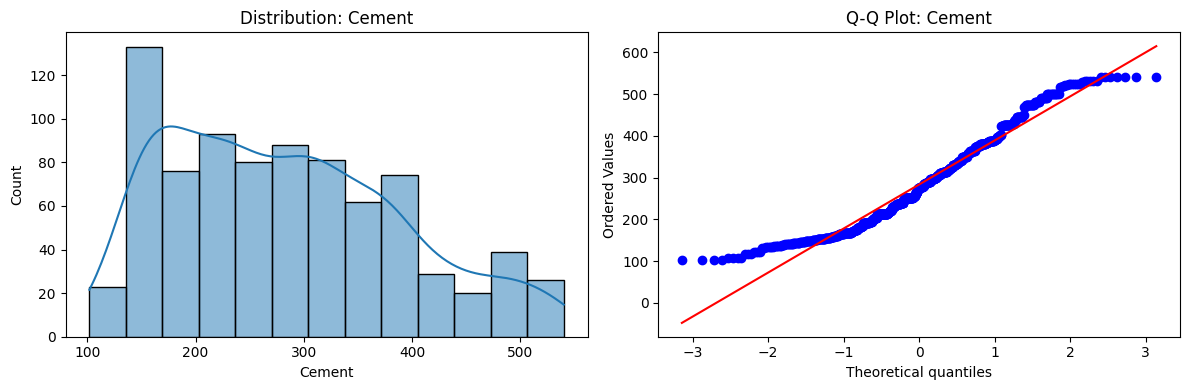

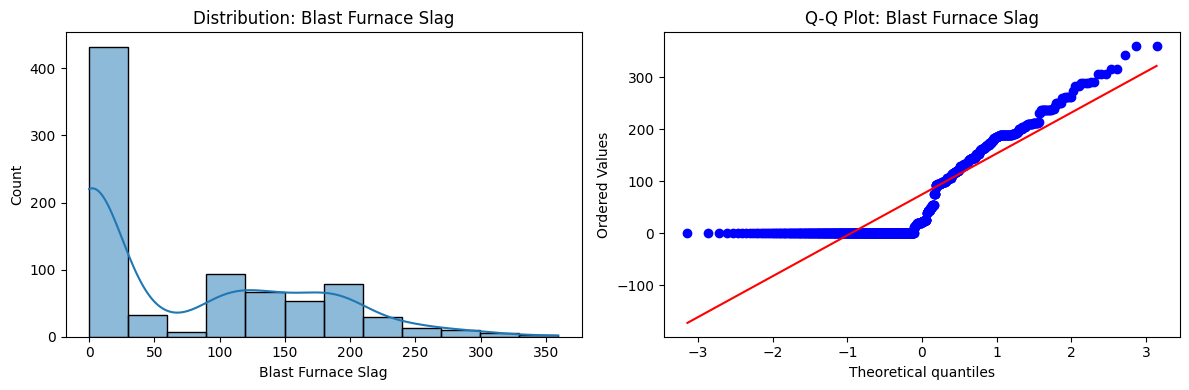

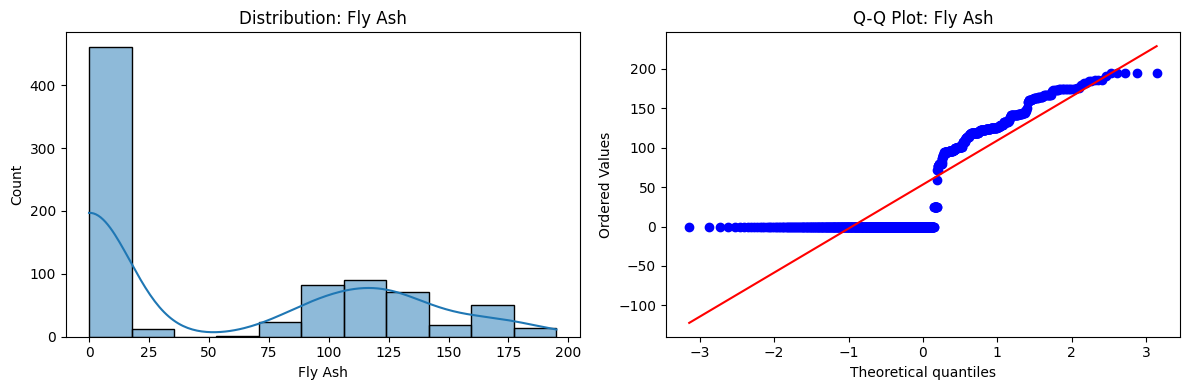

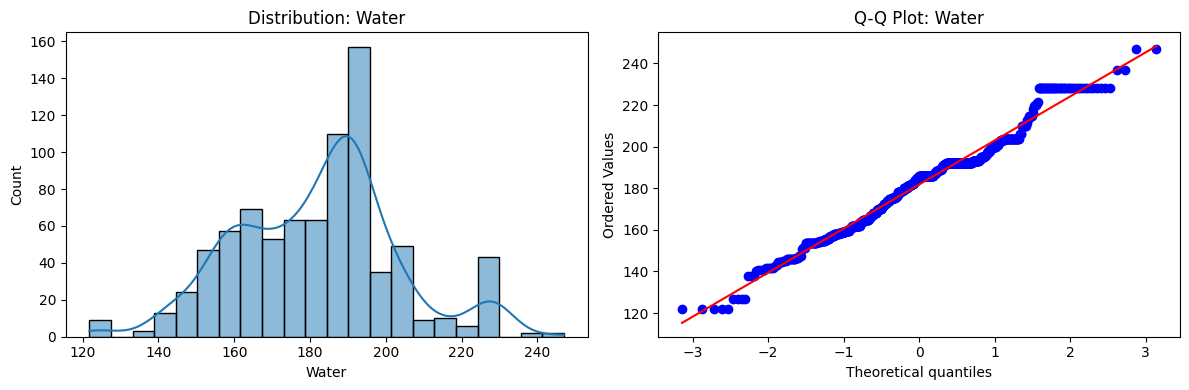

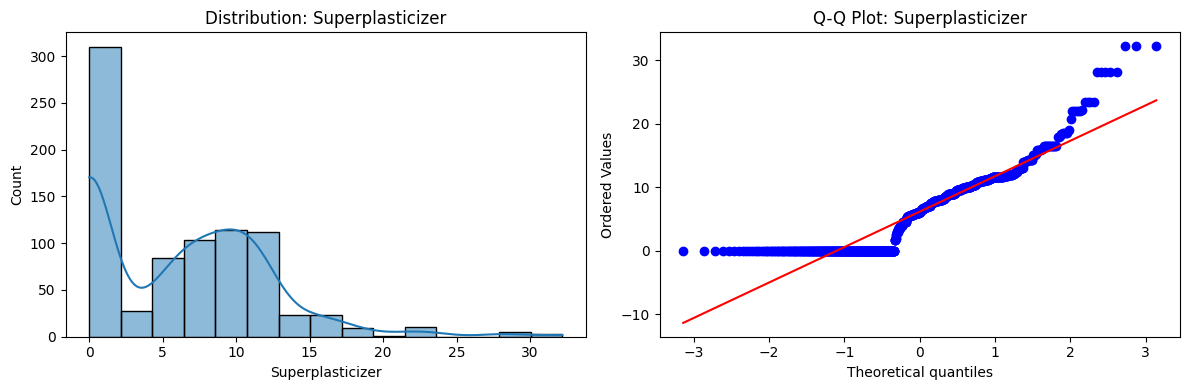

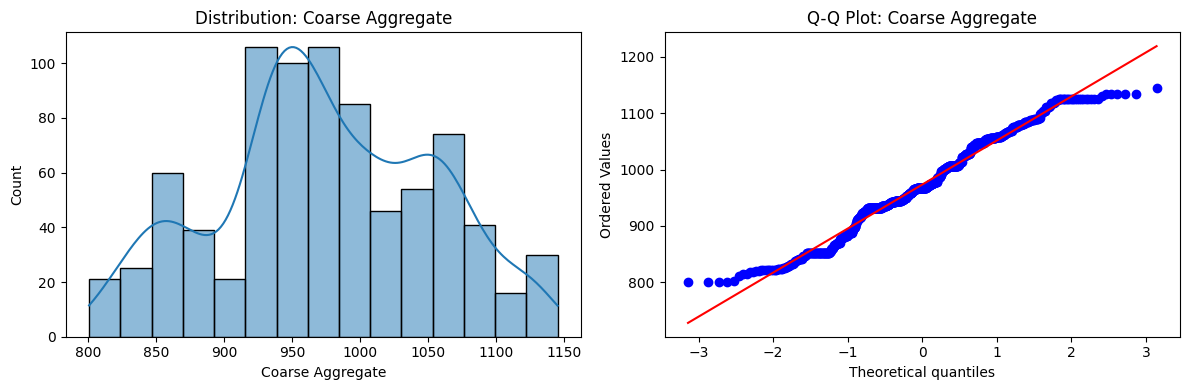

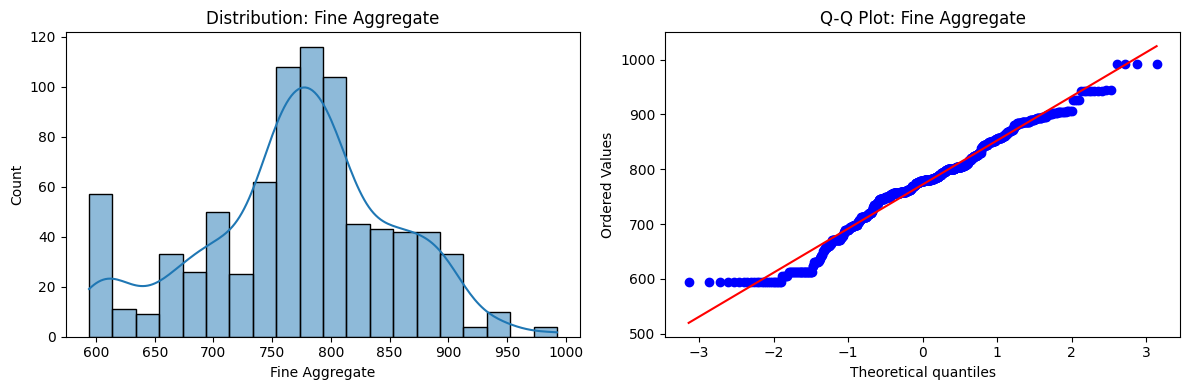

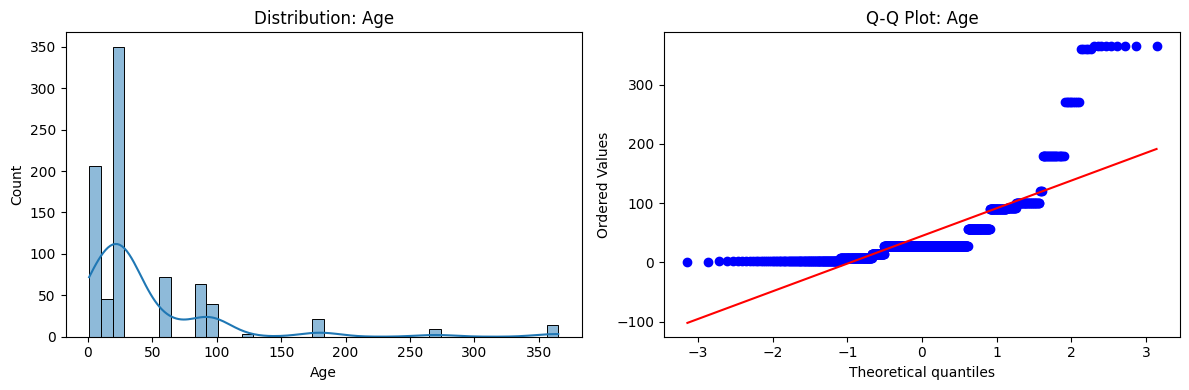

In [43]:
for col in x_train.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    

    sns.histplot(x_train[col], kde=True, ax=ax1)
    ax1.set_title(f'Distribution: {col}')
    

    stats.probplot(x_train[col], dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot: {col}')
    
    plt.tight_layout()
    plt.show()

Applying Box-cox 

In [44]:
bc = PowerTransformer(method = 'box-cox')

In [45]:
x_train_transformed = bc.fit_transform(x_train + 0.00000000000000001)

In [46]:
x_test_transformed = bc.fit_transform(x_test + 0.0000000000000000001)

In [51]:
x_test_transformed

array([[ 0.06067735,  0.91898616, -0.98072855, ..., -0.52587939,
        -1.39591619,  2.19054368],
       [ 1.00897122,  0.94593916, -0.98072855, ..., -0.35483481,
        -0.35659541, -1.00885377],
       [ 1.24047555,  0.94593916, -0.98072855, ..., -0.35483481,
        -0.35659541,  0.13409407],
       ...,
       [ 0.28009187,  0.94920446, -0.98072855, ...,  0.45779978,
         0.27655798, -1.00885377],
       [ 1.5124169 ,  0.83228078,  1.02541378, ..., -1.98806305,
        -0.43068959,  0.69689766],
       [ 0.79754994, -1.09106919, -0.98072855, ..., -0.03987959,
        -0.02821734,  1.07884474]], shape=(206, 8))

In [53]:
pd.DataFrame({'cols' : x_train.columns , 'lambda_val' : 
              bc.lambdas_})

,cols,lambda_val
0,Cement,0.215602
1,Blast Furnace Slag,0.010728
2,Fly Ash,-0.002418
3,Water,0.959062
4,Superplasticizer,0.037033
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


As above we can see that for each x_train data columns we have a Lambda value from Box-cox transform, now for an example each value of cement column will be transformed with the lambda value (x power lambda)

Now trying a linear regression with transformed data 

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(x_train_transformed , y_train)

LinearRegression()

In [58]:
lr_pred = lr.predict(x_test_transformed)

In [59]:
lr_pred

array([50.03048156, 47.12999183, 65.15690806, 40.13191748, 15.78061012,
       45.09019358, 27.68968067, 47.97104527, 30.59452924, 46.49934975,
       41.21028624, 16.41085003, 52.36024917, 42.43202121, 29.87557427,
       25.22811374, 34.42683222, 21.89656653, 39.28843393, 27.97753742,
       38.45883127, 26.15490273, 42.75683527,  6.32343944, 37.17390342,
       35.25157139, 11.52786586, 52.4574472 , 44.59386839, 13.81971919,
       42.06148933, 37.18896383, 39.92668965, 50.24744291, 15.49947617,
       36.90162176, 30.49016675, 44.82757968,  7.89453446, 44.37724521,
       19.09281374, -3.2927118 , 36.28543633, 55.14393789,  9.1093432 ,
       63.60091119, 50.84566349, 50.01762234, 26.64686018,  1.41382573,
       49.45891682, 42.51536959, 26.8700625 , 18.38911146, 42.06648014,
       39.79289469, 24.99140888, 14.63459474, 34.2812937 , 25.75096253,
       44.75202967, 14.4229309 , 37.51370125, 53.16334006, 27.95199723,
       24.93219293, 38.28945012, 20.47543449, 30.99456644, 25.64

In [60]:
r2_score(y_test , lr_pred)

0.8029987092715897

In [69]:
bc= PowerTransformer(method = 'box-cox')
x_transformed = bc.fit_transform(x+0.0000000000000000001)

lr= LinearRegression()
np.mean(cross_val_score(lr, x_transformed , y , scoring = 'r2' , cv = 10))

np.float64(0.6433417403535501)

In [74]:
x_train_transformed_pd = pd.DataFrame(x_train_transformed , columns = x_train.columns)

In [75]:
x_train_transformed_pd

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.935515,1.127401,-0.301920,0.818270,-0.262500,-0.677568,0.106010
1,1.244706,0.825010,1.131445,-0.165055,0.759951,-1.912728,-0.314062,0.106010
2,0.079842,-1.088283,1.128826,-1.047291,0.775478,1.018407,0.025957,-1.675970
3,-0.145641,0.910538,1.114107,0.581224,0.753803,-1.750779,0.583253,0.106010
4,-1.131044,0.862380,1.129565,-1.105297,0.784380,1.368575,0.262623,-1.675970
...,...,...,...,...,...,...,...,...
819,0.183601,0.953045,-0.887339,-1.769923,0.788111,0.390563,0.358776,-1.675970
820,-0.198733,-1.088283,1.129766,-1.839129,0.795202,1.445973,0.322797,-0.475625
821,-0.844517,-1.088283,1.129791,-0.706089,0.775478,1.345367,0.297157,1.246733
822,1.565624,0.922338,-0.887339,-0.019311,0.764624,-1.537255,0.076211,0.106010


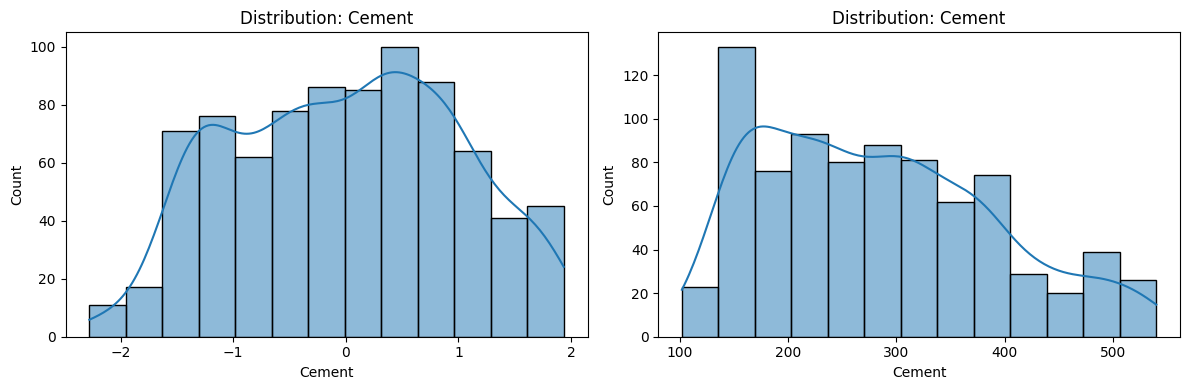

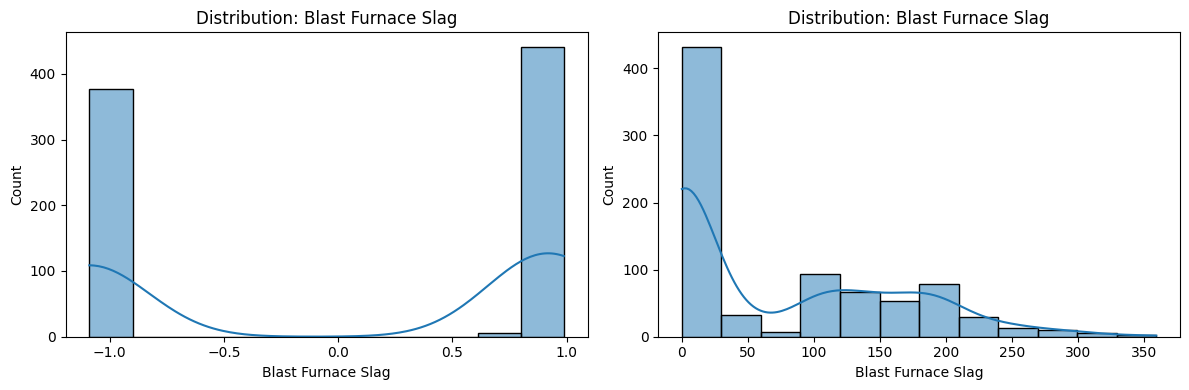

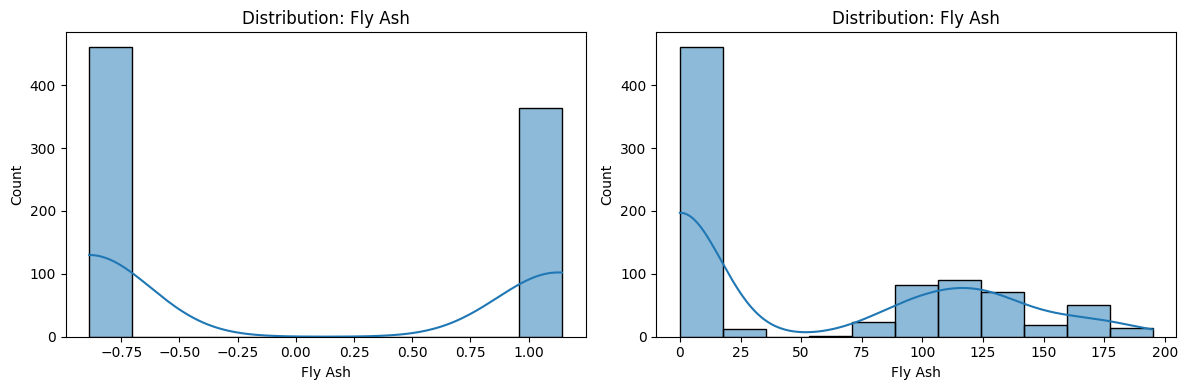

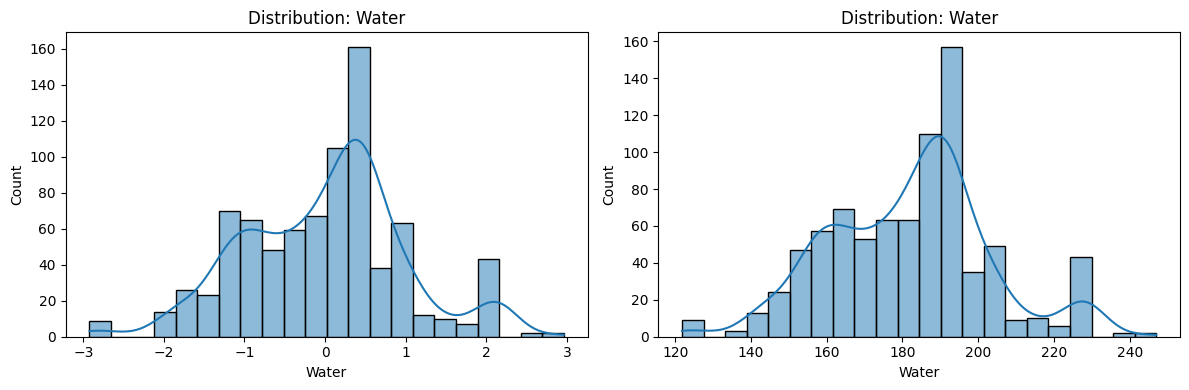

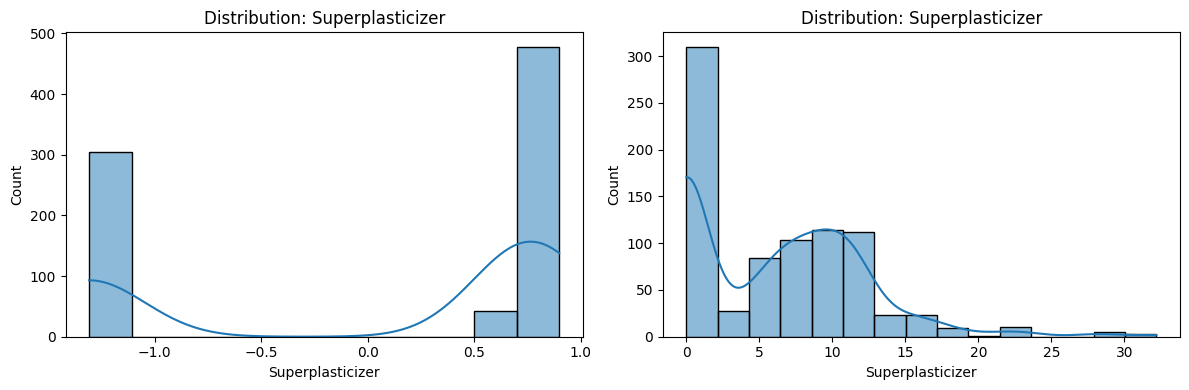

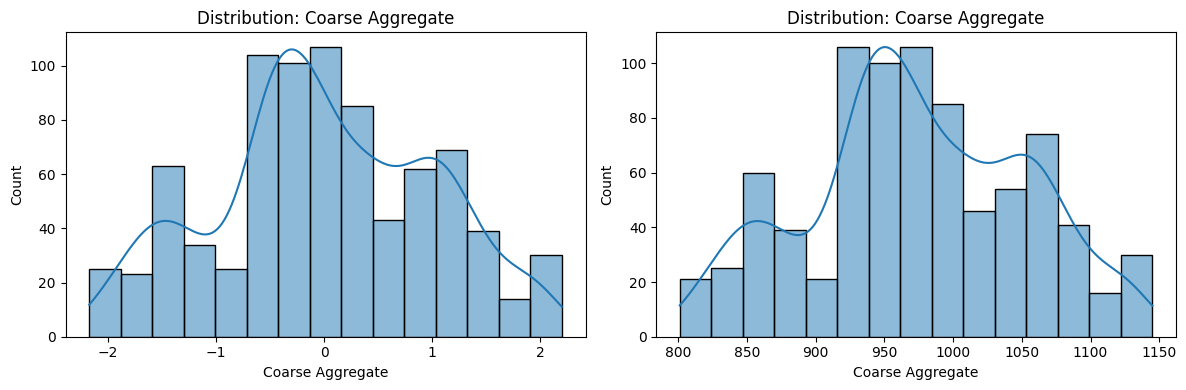

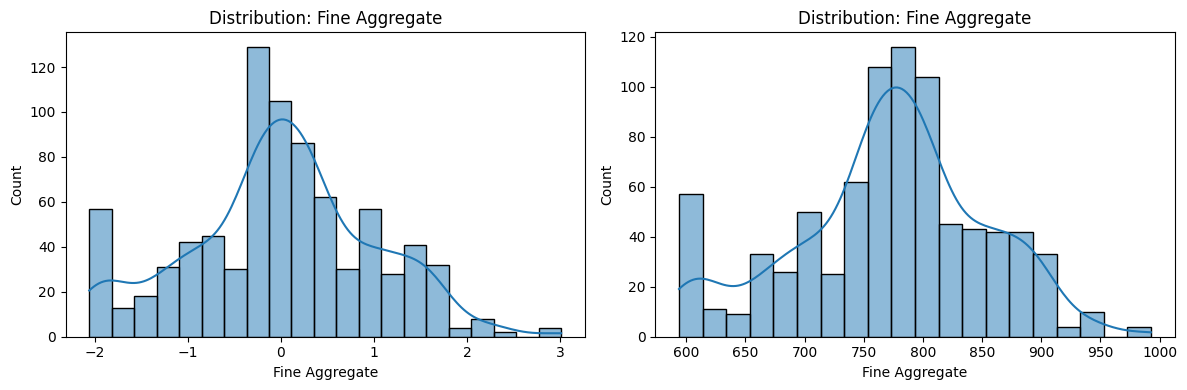

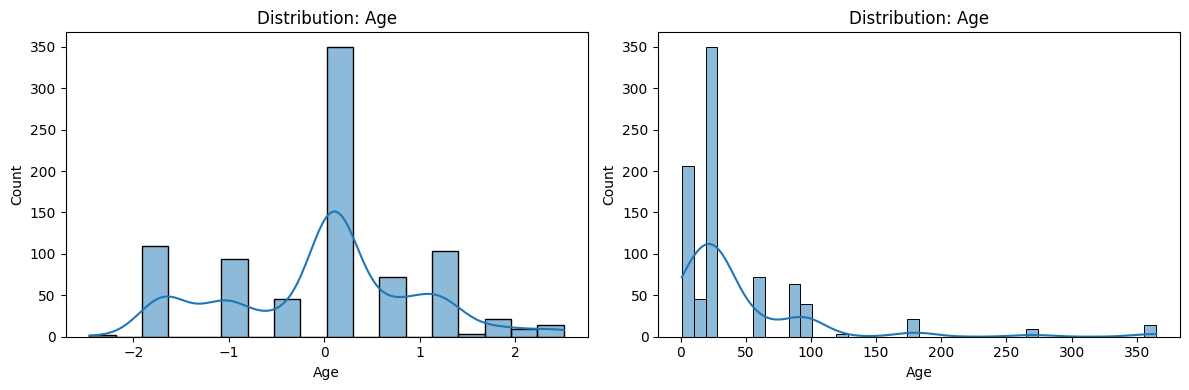

In [83]:
for col in x_train_transformed_pd.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    

    sns.histplot(x_train_transformed_pd[col], kde=True, ax=ax1)
    ax1.set_title(f'Distribution: {col}')
    

    sns.histplot(x_train[col], kde=True, ax=ax2)
    ax2.set_title(f'Distribution: {col}')
    
    
    plt.tight_layout()
    plt.show()

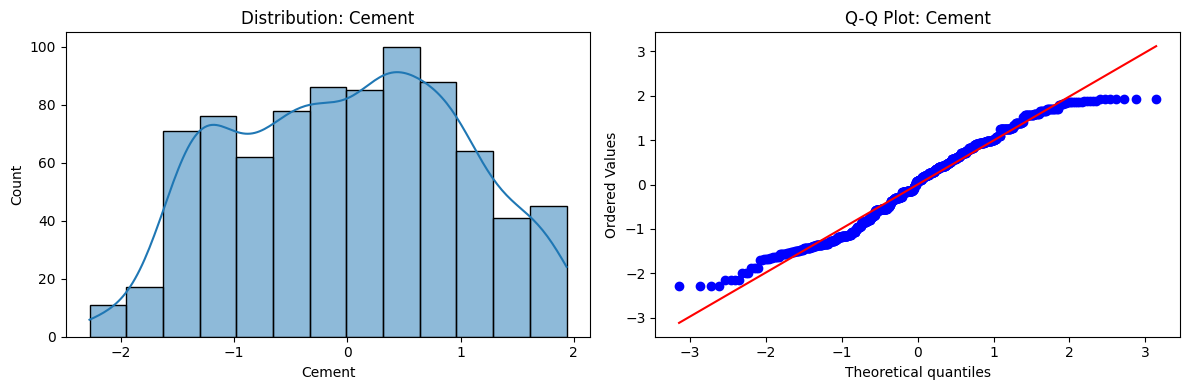

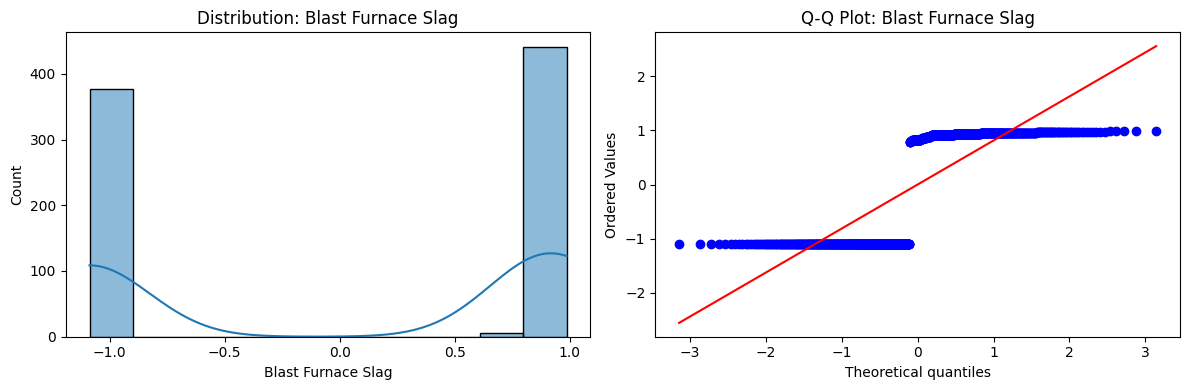

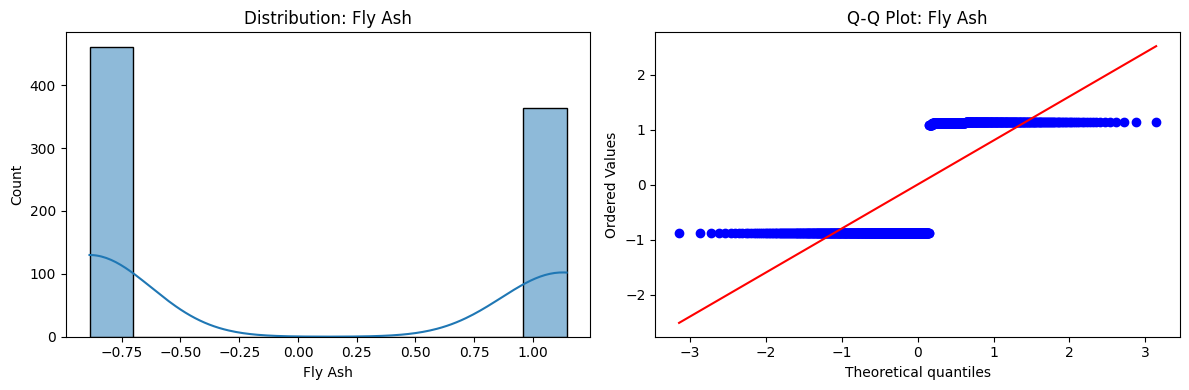

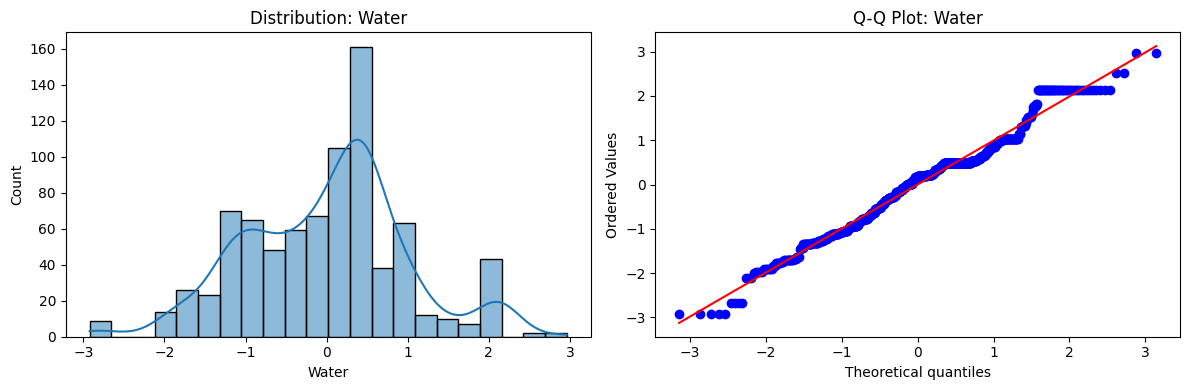

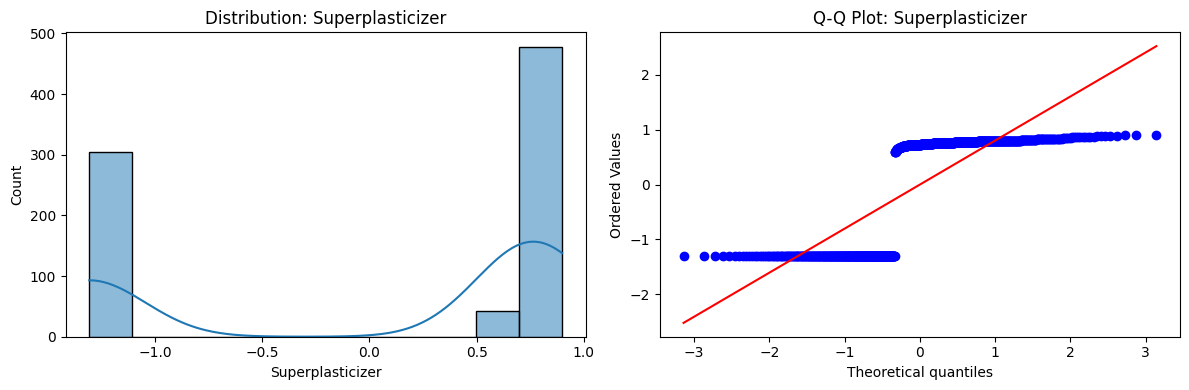

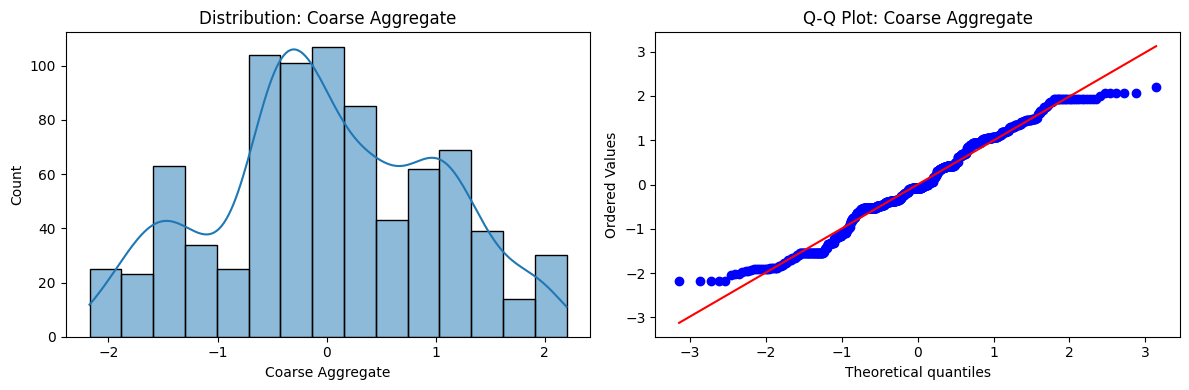

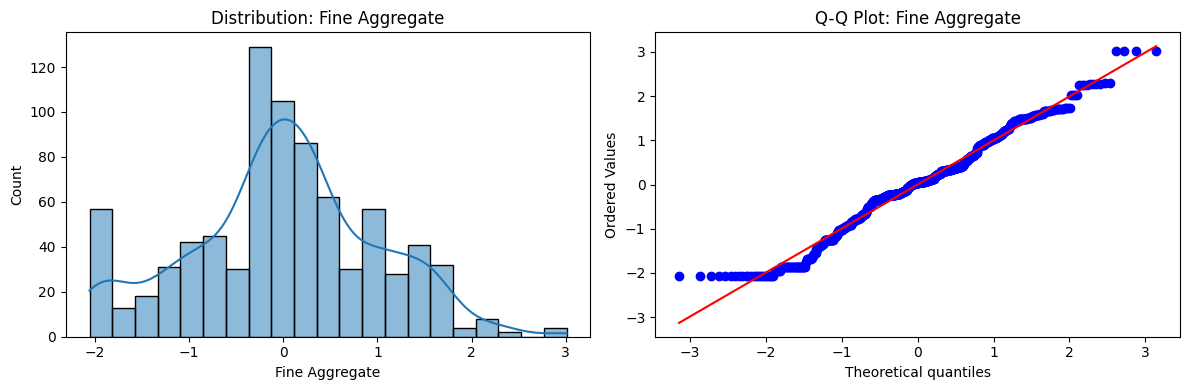

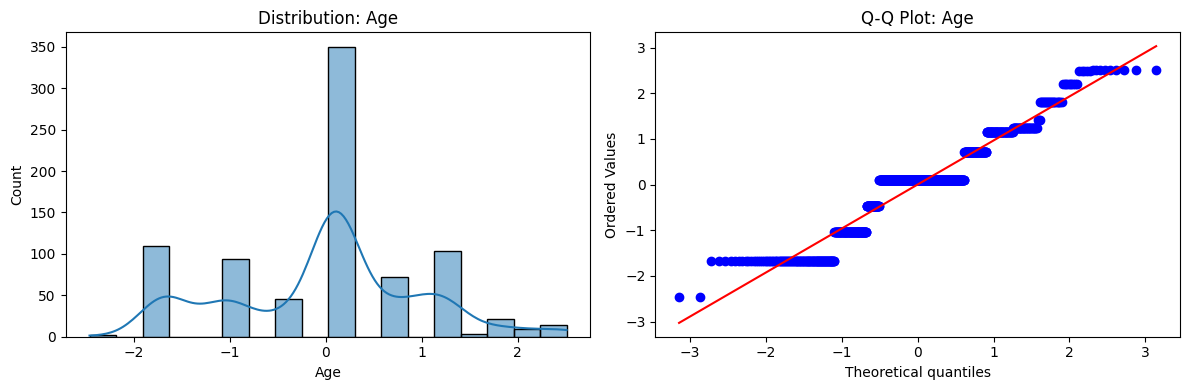

In [82]:
for col in x_train_transformed_pd.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    

    sns.histplot(x_train_transformed_pd[col], kde=True, ax=ax1)
    ax1.set_title(f'Distribution: {col}')
    

    stats.probplot(x_train_transformed_pd[col], dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot: {col}')
    
    plt.tight_layout()
    plt.show()

Now Applying the YJ Transformation

In [84]:
yj = PowerTransformer(method='yeo-johnson')

In [85]:
x_train_transformed_yj = yj.fit_transform(x_train)
x_test_transformed_yj = yj.fit_transform(x_test)

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(x_train_transformed_yj , y_train)

LinearRegression()

In [88]:
lr_pred_yj = lr.predict(x_train_transformed_yj)

In [89]:
lr_pred_yj

array([36.64221285, 53.53607003, 21.51940442, 38.95904147, 18.73037711,
       26.71103777, 29.95146784, 40.09995054, 39.59001221, -4.01294627,
       18.6076038 , 35.68275623, 23.77710621, 56.31223585, 31.74264639,
       51.5455194 , 53.75502537, 23.58604368, 48.86737653, 30.26774131,
       42.93077645, 25.78941118, 23.57193295, 30.71920048, 10.36166288,
       16.46286639, 38.58612189, 44.6971459 , 32.01116603, 45.05126167,
       38.15194004, 23.38132083, 41.28805598, 17.44269327, 27.69319539,
       40.3309671 , 61.70090052, 19.63764264, 73.21384718, 31.20020917,
       64.91053773, 20.85846142, 54.10485178, 66.92288551, 40.87650156,
       34.9312077 , 38.74485827, 28.4937589 , 34.55796937, 13.28126305,
       34.44362721, 16.99914951, 22.12138643, 30.86092012, 18.54908676,
       49.30146625, 29.13974638, 28.03489143, 10.54293828, 49.80157954,
       54.56633136, 34.40552909, 40.47080228, 55.53177568, 13.69049843,
        9.43520425, 29.51148227, 30.21739068, 30.87850294, 43.21

In [ ]:
lr_pred_test_yj = lr.predict(x_test_transformed_yj)
r2_yj = r2_score(y_test, lr_pred_test_yj)
print(r2_yj)

0.8153845515001845


In [93]:
pd.DataFrame({'columns' : x_train.columns, 'lambda_val' : yj.lambdas_})

,columns,lambda_val
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443
